<!DOCTYPE html>
<html>
<head>
  
  <style>
    body {
      font-family: Arial, sans-serif;
      text-align: center;
      padding: 50px;
    }
    h1 {
      font-size: 24px;
      margin-bottom: 20px;
    }
    p {
      font-size: 18px;
      margin-bottom: 10px;
    }
  </style>
</head>
<body>
  <h1>Trabajo Final</h1>
  <h2>Prediccion usuando un algoritmo de regresion lineal  con el set de datos propuesto
  </h2>
  <p><p><strong>Materia:</strong> Minería de Datos</p>
  <p><strong>Autores:</strong> Geovani Martinez y Manuel Murcia</p>
  <p><strong>Profesor:</strong> Luis Doria</p></p>

</body>
</html>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
df_train1 = pd.read_csv('/content/drive/MyDrive/train.csv')
df_train1.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [14]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
#
#df_train.head(20).fillna(0, inplace=True)

df_train.loc[:19, ['MSSubClass', 'LotFrontage', 'LotArea']] = df_train.loc[:19, ['MSSubClass', 'LotFrontage', 'LotArea']].fillna(0)
df_train.head(20)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Se realiza el analisis de la información creando un data frame con las siguientes caracteristicas campo **MSSubClass** = Que es un dato numerico que identifica el tipo de casa. **LotFrontage** = que es un dato numerico de area de fachada. **LotArea**=Que es un dato numerico del metraje del area de la casa. Y como etiqueta el campo **SalePrice** que es el precio de venta, Por lo tanto lo que se desea predecir es el **precio de venta.**

In [21]:
# Cargar el archivo CSV en un DataFrame de Pandas
#df = pd.read_csv('/content/drive/MyDrive/trainClean.csv')

#df.head(20)
#import pandas as pd

df = df_train[['MSSubClass', 'LotFrontage', 'LotArea','SalePrice']].copy()
df.head(20)


,MSSubClass,LotFrontage,LotArea,SalePrice
0,60,65.0,8450,208500
1,20,80.0,9600,181500
2,60,68.0,11250,223500
3,70,60.0,9550,140000
4,60,84.0,14260,250000
5,50,85.0,14115,143000
6,20,75.0,10084,307000
7,60,0.0,10382,200000
8,50,51.0,6120,129900
9,190,50.0,7420,118000


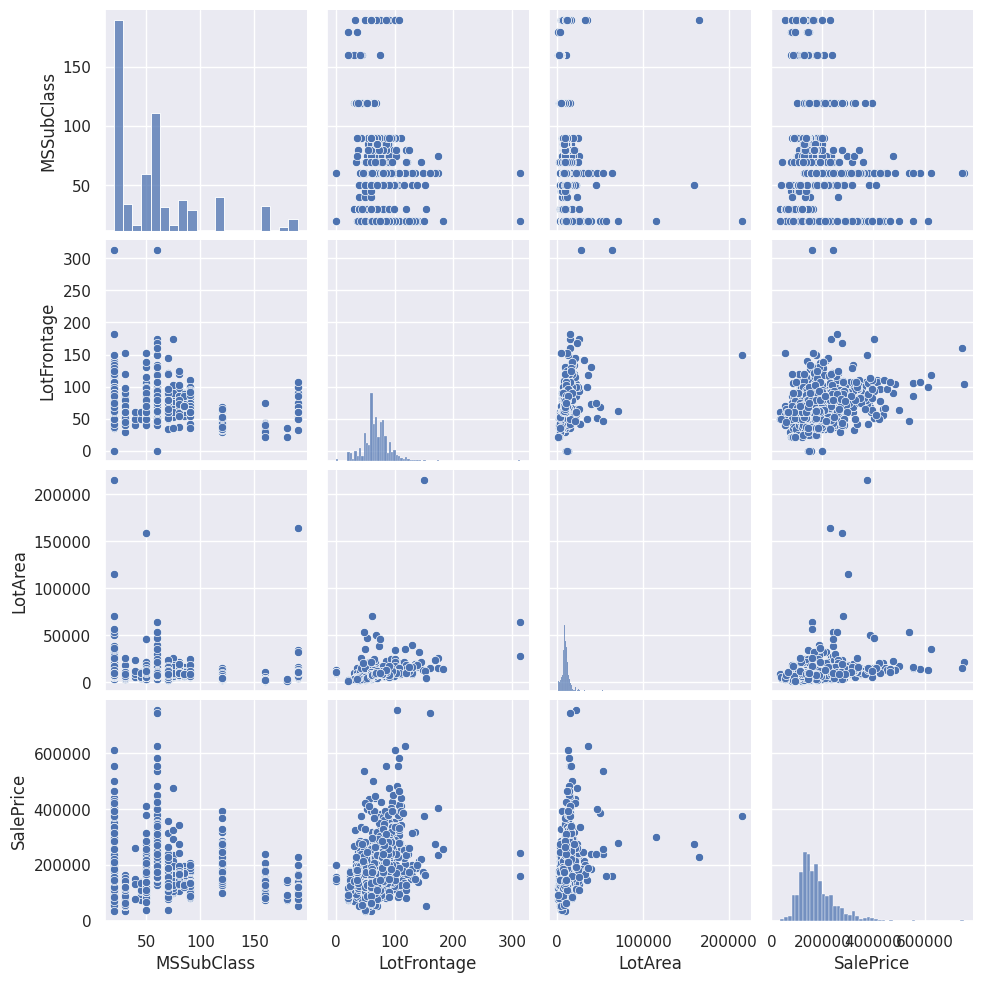

In [25]:
#pip install seaborn
import seaborn as sns

# Establecer el tamaño de fuente en los gráficos de Seaborn
sns.set(font_scale=1.25)

# Configurar los parámetros predeterminados de los gráficos de Seaborn
sns.set()

# Lista de columnas a utilizar en el gráfico de pares
cols = ['MSSubClass', 'LotFrontage', 'LotArea','SalePrice']

# Crear un gráfico de pares utilizando Seaborn
sns.pairplot(df_train[cols], height=2.5)

# Mostrar el gráfico
plt.show()

Este tipo de visualización es útil para identificar patrones, correlaciones y tendencias entre variables. Puedes observar cómo se relacionan las diferentes variables entre sí y cómo se distribuyen individualmente. Por ejemplo, puedes identificar si hay una relación lineal entre 'LotFrontage' y 'LotArea', o cómo se relaciona 'SalePrice' con las otras variables.

In [20]:



# Verificar la estructura y contenido del DataFrame
print(df.head())


# Dividir los datos en variables independientes (X) y la variable dependiente (y)
X = df.drop('SalePrice', axis=1)  # Variables independientes

y = df['SalePrice']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
# 20% de los datos se usaran para test
# 42 sera la semilla para obtener los valores aleatorios 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
regression_model = LinearRegression()

# Entrenar el modelo utilizando el conjunto de entrenamiento
regression_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)
#métrica comúnmente utilizada para evaluar la calidad de un modelo de regresión. Calcula la diferencia cuadrada promedio entre los valores reales y los valores predichos. Un valor de MSE más bajo indica un mejor ajuste del modelo a los datos observados.
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)



   Id  MSSubClass  LotFrontage  LotArea  SalePrice
0   1          60           65     8450     208500
1   2          20           80     9600     181500
2   3          60           68    11250     223500
3   4          70           60     9550     140000
4   5          60           84    14260     250000
Error cuadrático medio: 5038061313.00811


**CONCLUSION DEL RESULTADO DEL ERROR CUADRATICO MEDIO MSE: El modelo no es bueno, ya que el valor de MSE es muy alto. Por lo tanto hay que escoger otras variables dependientes para lograr un mejor modelo de datos.**

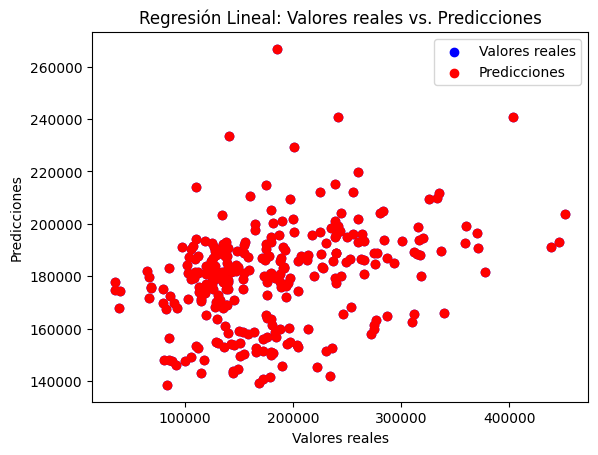

In [3]:
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

# Graficar las predicciones frente a los valores reales con diferentes colores
plt.scatter(y_test, y_pred, c='b', label='Valores reales')
plt.scatter(y_test, y_pred, c='r', label='Predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Valores reales vs. Predicciones')
plt.legend()
plt.show()

**CONCLUSION FINAL**

Para mejorar las predicciones se debe:

Evalúar la importancia de las características y considerar la posibilidad de seleccionar un subconjunto diferente de campos para mejorar el resultado del modelo. 




